In [74]:
!pip install tensorflow
!pip install matplotlib
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [75]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [76]:
datasets=tf.keras.utils.image_dataset_from_directory(
    "datasets",
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [77]:
class_names = datasets.class_names
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [78]:
len(datasets)

68

In [79]:
for image_batch, label_batch in datasets.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 0 1 2 1 1 2 1 1 0 2 1 0 0 0 1 1 1 1 2 0 1 0 0 0 0 1 0 1 1 0 1]


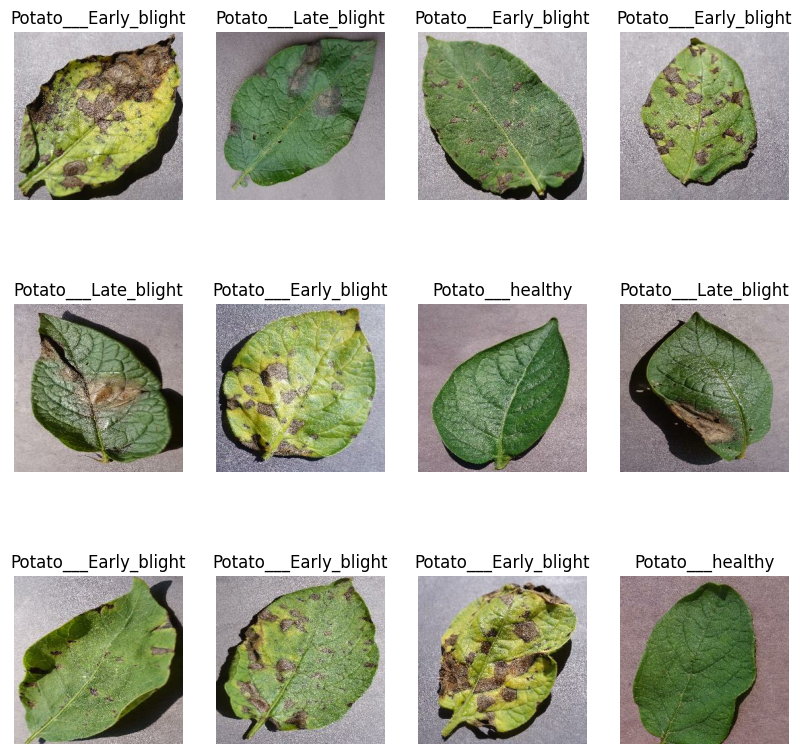

In [80]:
plt.figure(figsize = (10,10))
for image_batch, labels_batch in datasets.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [83]:
train_datasets = datasets.take(54)
len(train_datasets)

54

In [87]:
test_datasets = datasets.skip(54)
len(test_datasets)

14

In [88]:
val_datasets = test_datasets.take(6)
len(val_datasets)

6

In [89]:
test_datasets = test_datasets.skip(6)
len(test_datasets)

8

In [ ]:
def get_datasets_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    
    
    return train_ds, val_ds, test_ds